In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import minimize
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
result = pd.read_csv('CIBERSORTx_B_mode_Results.csv')
result.head()

,Mixture,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
0,TCGA-B2-4101-01A,0.017908,0.010355,0.016917,0.212831,0.0,0.194865,0.004462,0.000000,0.006790,...,0.185134,0.027976,0.000000,0.054846,0.000000,0.000000,0.002600,0.0,0.614268,0.808737
1,TCGA-BP-4342-01A,0.050115,0.000853,0.006321,0.100596,0.0,0.321614,0.008572,0.026975,0.013780,...,0.196363,0.016663,0.000000,0.036051,0.000000,0.000000,0.007450,0.0,0.779098,0.713360
2,TCGA-B0-4691-01A,0.037564,0.000492,0.046021,0.329307,0.0,0.062429,0.000000,0.071528,0.041282,...,0.119431,0.021210,0.000581,0.022522,0.000000,0.002525,0.001124,0.0,0.671676,0.759774
3,TCGA-BP-4167-01A,0.013130,0.002263,0.003728,0.289709,0.0,0.131651,0.010063,0.039653,0.047470,...,0.229736,0.019357,0.000000,0.042951,0.000000,0.000000,0.007747,0.0,0.772229,0.700801
4,TCGA-B8-4620-01A,0.025680,0.000000,0.002746,0.041831,0.0,0.160541,0.014921,0.003004,0.042453,...,0.244937,0.000000,0.077869,0.020962,0.004124,0.014958,0.118157,0.0,0.610422,0.814964


In [3]:
result.shape

(607, 26)

In [4]:
b= result[result['P-value'] <= 0.05]
b.shape

(603, 26)

In [5]:
b=b.drop(['P-value','Correlation','RMSE'],axis=1)
b=b.set_index('Mixture')
b.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
Mixture,,,,,,,,,,,,,,,,,,,,,
TCGA-B2-4101-01A,0.017908,0.010355,0.016917,0.212831,0.0,0.194865,0.004462,0.000000,0.006790,0.000000,...,0.085382,0.001999,0.086229,0.185134,0.027976,0.000000,0.054846,0.000000,0.000000,0.002600
TCGA-BP-4342-01A,0.050115,0.000853,0.006321,0.100596,0.0,0.321614,0.008572,0.026975,0.013780,0.000000,...,0.044974,0.011350,0.088139,0.196363,0.016663,0.000000,0.036051,0.000000,0.000000,0.007450
TCGA-B0-4691-01A,0.037564,0.000492,0.046021,0.329307,0.0,0.062429,0.000000,0.071528,0.041282,0.060626,...,0.032200,0.003322,0.087612,0.119431,0.021210,0.000581,0.022522,0.000000,0.002525,0.001124
TCGA-BP-4167-01A,0.013130,0.002263,0.003728,0.289709,0.0,0.131651,0.010063,0.039653,0.047470,0.047300,...,0.008229,0.000000,0.071119,0.229736,0.019357,0.000000,0.042951,0.000000,0.000000,0.007747
TCGA-B8-4620-01A,0.025680,0.000000,0.002746,0.041831,0.0,0.160541,0.014921,0.003004,0.042453,0.000000,...,0.095538,0.044268,0.039562,0.244937,0.000000,0.077869,0.020962,0.004124,0.014958,0.118157


In [20]:
#RCC mixture data 
mixture = pd.read_csv('mixture_xena.tsv',  sep='\t')
mixture=mixture.rename(columns={'Ensembl_ID':'Hugo_Symbol'})
mixture[['Hugo_Symbol']] = mixture[['Hugo_Symbol']].astype(str)
mixture.shape

(52291, 608)

In [21]:
#this is for adding a specific gene (RGS5) to the clinical data
RGS5=mixture.loc[mixture['Hugo_Symbol']=='RGS5']
RGS5=RGS5.set_index(['Hugo_Symbol'])
RGS5=RGS5.T
RGS5.shape

(607, 1)

In [22]:
#read clinical data:
clinical_data = pd.read_csv('clinical_data_NEW.csv')
clinical_data=clinical_data.set_index(['PATIENT_ID'])
clinical_data=clinical_data.drop(['RGS5','RGS5 level'],axis=1)
clinical_data.head()

,OTHER_PATIENT_ID,FORM_COMPLETION_DATE,HISTOLOGICAL_DIAGNOSIS,GRADE,LATERALITY,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,SEX,DAYS_TO_BIRTH,RACE,...,SERUM_LATERALITY,SERUM_OS,TUMOR_SERUM,OS_WBC,TUMOR_WBC,sex_and_os_status,Later os_status,TUMOR_LATERALITY,TUMOR_SEX,SEX_LATERALITY
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-3Z-A93Z,2B1DEA0A-6D55-4FDD-9C1C-0D9FBE03BD78,11/11/14,Kidney Clear Cell Renal Carcinoma,G2,Right,YES,NO,Male,-25205,BLACK OR AFRICAN AMERICAN,...,"Normal, Right","Living, Normal","Tumor Free, Normal","Living, Normal","Tumor Free, Normal","Male, Living","Right, Living","Tumor Free, Right","Tumor Free, Male","Male, Right"
TCGA-6D-AA2E,D3B47E53-6F40-4FC8-B5A4-CBE548A770A9,3/17/14,Kidney Clear Cell Renal Carcinoma,G2,Right,YES,NO,Female,-25043,BLACK OR AFRICAN AMERICAN,...,NaN,NaN,NaN,NaN,NaN,"Female, Living","Right, Living","Tumor Free, Right","Tumor Free, Female","Female, Right"
TCGA-A3-3306,9fb55e0b-43d8-40a3-8ef2-d198e6290551,8/23/10,Kidney Clear Cell Renal Carcinoma,G3,Left,NO,YES,Male,-24569,WHITE,...,NaN,NaN,NaN,NaN,NaN,"Male, Living","Left, Living",NaN,NaN,"Male, Left"
TCGA-A3-3307,7ac1d6c6-9ade-49af-8794-10b5b96b2b05,4/13/10,Kidney Clear Cell Renal Carcinoma,G3,Right,NO,YES,Male,-24315,[Not Available],...,NaN,NaN,NaN,NaN,NaN,"Male, Living","Right, Living","With Tumor, Right","With Tumor, Male","Male, Right"
TCGA-A3-3308,3cbca837-f5a7-4a87-8f02-c59eac232d5a,4/12/10,Kidney Clear Cell Renal Carcinoma,G2,Right,NO,YES,Female,-28287,WHITE,...,"Normal, Right","Living, Normal","Tumor Free, Normal","Living, Normal","Tumor Free, Normal","Female, Living","Right, Living","Tumor Free, Right","Tumor Free, Female","Female, Right"


# Clustering

In [46]:
cell_proportions=Ciber_result
cell_proportions.head()

,Plasma cells,CD8 T cells,T cells $\gamma \delta$,Monocytes,Eosinophils,Neutrophils,B cells,CD4 T cells,NK cells,Macrophages,Mast cells,DC,Cluster_4
Mixture,,,,,,,,,,,,,
TCGA-B2-4101,0.016917,0.212831,0.000000,0.085382,0.000000,0.002600,0.028263,0.206117,0.091706,0.273362,0.054846,0.027976,1
TCGA-BP-4342,0.006321,0.100596,0.000000,0.044974,0.000000,0.007450,0.050968,0.370941,0.070184,0.295851,0.036051,0.016663,0
TCGA-B0-4691,0.046021,0.329307,0.060626,0.032200,0.002525,0.001124,0.038056,0.175239,0.060224,0.210365,0.022522,0.021791,2
TCGA-BP-4167,0.003728,0.289709,0.047300,0.008229,0.000000,0.007747,0.015393,0.228837,0.035894,0.300855,0.042951,0.019357,1
TCGA-B8-4620,0.002746,0.041831,0.000000,0.095538,0.014958,0.118157,0.025680,0.220918,0.048452,0.328767,0.025085,0.077869,0


In [47]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,12) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(cell_proportions) 
    kmeanModel.fit(cell_proportions)     
      
    distortions.append(sum(np.min(cdist(cell_proportions, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / cell_proportions.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(cell_proportions, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / cell_proportions.shape[0] 
          
    mapping2[k] = kmeanModel.inertia_ 

In [48]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 754.8590922319812
2 : 138.28336221193422
3 : 53.67931437249112
4 : 7.002664253967316
5 : 6.401670983827152
6 : 6.048735389698191
7 : 5.618466331150341
8 : 5.3592916292940735
9 : 5.079113603154334
10 : 4.768361163211749
11 : 4.604288871292402


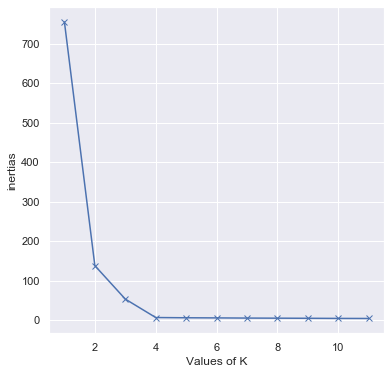

In [49]:
sns.set(rc={'figure.figsize':(6,6)})

plt.figure
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('inertias') 
#plt.title('The Elbow Method using Distortion') 
plt.savefig('Elbow.eps', format='eps',bbox_inches='tight', dpi=1000)

plt.show()


In [50]:
kmeans = KMeans(n_clusters=4)

y = kmeans.fit_predict(cell_proportions)

cell_proportions['Cluster_4'] = y

cell_proportions=cell_proportions.sort_values(by=['Cluster_4'])
cell_proportions.head()

,Plasma cells,CD8 T cells,T cells $\gamma \delta$,Monocytes,Eosinophils,Neutrophils,B cells,CD4 T cells,NK cells,Macrophages,Mast cells,DC,Cluster_4
Mixture,,,,,,,,,,,,,
TCGA-B2-4101,0.016917,0.212831,0.000000,0.085382,0.000000,0.002600,0.028263,0.206117,0.091706,0.273362,0.054846,0.027976,0
TCGA-BP-5200,0.010760,0.247006,0.003749,0.041871,0.001411,0.023431,0.075535,0.224019,0.086079,0.230605,0.043631,0.011903,0
TCGA-B8-5163,0.008879,0.242621,0.026512,0.053418,0.000000,0.006708,0.034241,0.274083,0.000000,0.328297,0.025241,0.000000,0
TCGA-BP-4776,0.089006,0.203825,0.013644,0.032917,0.002571,0.002728,0.045371,0.203205,0.080401,0.224142,0.087217,0.014972,0
TCGA-B0-4694,0.027111,0.294169,0.064238,0.021328,0.000000,0.000585,0.035336,0.109165,0.000000,0.424615,0.019566,0.003887,0


In [51]:

a=cell_proportions[['Cluster_4']]
a.head()

,Cluster_4
Mixture,
TCGA-B2-4101,0
TCGA-BP-5200,0
TCGA-B8-5163,0
TCGA-BP-4776,0
TCGA-B0-4694,0


In [52]:
clinical = pd.concat([clinical, a], axis=1, sort=False)
clinical.head()

,OTHER_PATIENT_ID,FORM_COMPLETION_DATE,HISTOLOGICAL_DIAGNOSIS,GRADE,LATERALITY,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,SEX,DAYS_TO_BIRTH,RACE,...,Eosinophils,Neutrophils,B cells,CD4 T cells,NK cells,Macrophages,Mast cells,DC,Cluster_4,Cluster_4
TCGA-3Z-A93Z,2B1DEA0A-6D55-4FDD-9C1C-0D9FBE03BD78,11/11/14,Kidney Clear Cell Renal Carcinoma,G2,Right,YES,NO,Male,-25205,BLACK OR AFRICAN AMERICAN,...,0.00000,0.001034,0.059224,0.187487,0.113686,0.305984,0.056969,0.025606,0,2
TCGA-A3-3306,9fb55e0b-43d8-40a3-8ef2-d198e6290551,8/23/10,Kidney Clear Cell Renal Carcinoma,G3,Left,NO,YES,Male,-24569,WHITE,...,0.00000,0.022570,0.041937,0.319325,0.064389,0.321450,0.021766,0.017199,0,2
TCGA-A3-3307,7ac1d6c6-9ade-49af-8794-10b5b96b2b05,4/13/10,Kidney Clear Cell Renal Carcinoma,G3,Right,NO,YES,Male,-24315,[Not Available],...,0.00000,0.006810,0.016749,0.178409,0.012962,0.292923,0.062730,0.012505,1,0
TCGA-A3-3308,3cbca837-f5a7-4a87-8f02-c59eac232d5a,4/12/10,Kidney Clear Cell Renal Carcinoma,G2,Right,NO,YES,Female,-28287,WHITE,...,0.00000,0.003051,0.054468,0.214483,0.066538,0.371643,0.067833,0.021316,3,1
TCGA-A3-3311,0c139772-e303-45d1-b0c7-438fa1db105e,4/20/10,Kidney Clear Cell Renal Carcinoma,G2,Right,NO,YES,Male,-21183,[Not Available],...,0.00127,0.010160,0.072805,0.223623,0.010893,0.325696,0.038892,0.005695,0,2


In [54]:
df_mean = cell_proportions.groupby('Cluster_4').mean().reset_index()
df_mean

,Cluster_4,Plasma cells,CD8 T cells,T cells $\gamma \delta$,Monocytes,Eosinophils,Neutrophils,B cells,CD4 T cells,NK cells,Macrophages,Mast cells,DC
0,0,0.029307,0.246694,0.016578,0.041183,0.001318,0.007460,0.043478,0.220845,0.038018,0.290754,0.046310,0.018057
1,1,0.010131,0.117310,0.009297,0.049304,0.005132,0.011967,0.043303,0.220081,0.045769,0.409153,0.059749,0.018804
2,2,0.012022,0.112085,0.007142,0.072925,0.006601,0.011863,0.056136,0.256651,0.071646,0.290583,0.073258,0.029087
3,3,0.013608,0.441230,0.023494,0.037706,0.001446,0.004251,0.021983,0.147373,0.041236,0.229476,0.025266,0.012930


In [55]:
#rename clusters:
cell_proportions['Cluster_4'] = cell_proportions['Cluster_4'].map({0:r'$CD4< CD8 \approx  M\Phi$', 1:r'$CD8<CD4<M\Phi$',2:r'$CD4<M\Phi<CD8$',3:r'$CD8< CD4\approx M\Phi$'})

In [56]:
cell_proportions[['Cluster_4']].head()

,Cluster_4
Mixture,
TCGA-B2-4101,$CD4< CD8 \approx M\Phi$
TCGA-BP-5200,$CD4< CD8 \approx M\Phi$
TCGA-B8-5163,$CD4< CD8 \approx M\Phi$
TCGA-BP-4776,$CD4< CD8 \approx M\Phi$
TCGA-B0-4694,$CD4< CD8 \approx M\Phi$


<function matplotlib.pyplot.show(*args, **kw)>

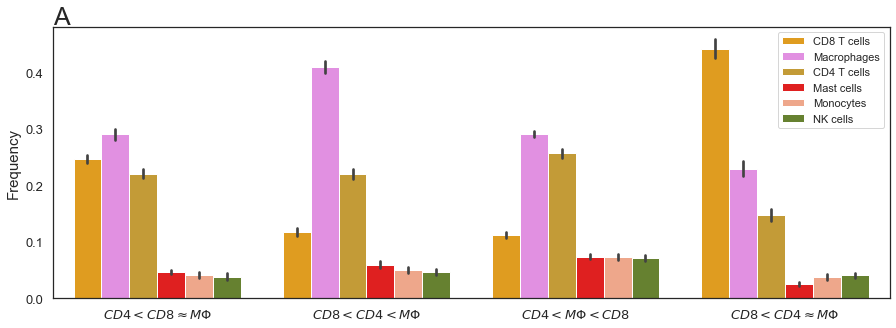

In [57]:
# Calculate variables with largest differences (by standard deviation)
# The higher the standard deviation in a variable based on average values for each cluster
# The more likely that the variable is important when creating the cluster

sns.set(style="white")

results = pd.DataFrame(columns=['Variable', 'Std'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.std(df_mean[column])]
selected_columns = list(results.sort_values('Std', ascending=False).head(6).Variable.values) + ['Cluster_4']

# Plot data

tidy = cell_proportions[selected_columns].melt(id_vars='Cluster_4')
palette={'Macrophages':'violet','CD8 T cells':'orange','CD4 T cells':'goldenrod','Monocytes':'lightsalmon','NK cells':'olivedrab','Mast cells':'red','B cells':'darkcyan','T cells gamma delta':'dodgerblue','DC':'gray','Plasma cells':'seagreen','Neutrophils':'navy', 'Eosinophils':'purple'}
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Cluster_4', y='value', hue='variable',order=[r'$CD4< CD8 \approx  M\Phi$', r'$CD8<CD4<M\Phi$',r'$CD4<M\Phi<CD8$',r'$CD8< CD4\approx M\Phi$']
,data=tidy, palette=palette)
plt.legend(loc='upper right')
ax.tick_params(labelsize=13)

plt.xlabel('')
plt.ylabel('Frequency',size=15)
plt.text(-0.5,0.485,"A", fontsize=25)

plt.show

#plt.savefig("bmode_4cluster.eps",format='eps',bbox_inches='tight', dpi=1000)


In [ ]:
#save the data with clusters
clinical.to_csv('clinical_cluster_b_mode.csv')





# PCA